<a href="https://colab.research.google.com/github/raju98610/covid-19/blob/main/Covid_19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
# pandas is aliased as pd
import numpy as np
# numpy is aliased as np
import matplotlib.pyplot as plt
# pyplot is aliased as plt
import seaborn as sns
# seaborn is aliased as sns

In [37]:
df = pd.read_csv('/content/covid.csv')
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,date,day,month,year,cases,deaths,countries,geoId,countryterritoryCode,popData2018
0,4/6/2020,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0
1,4/5/2020,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
2,4/4/2020,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
3,4/3/2020,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0
4,4/2/2020,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0


In [38]:
df.shape

(9107, 10)

In [39]:
df['countries'].value_counts()

Italy                                98
Belgium                              98
China                                98
Canada                               98
Czech_Republic                       98
                                     ..
Bonaire, Saint Eustatius and Saba     5
Malawi                                4
Falkland_Islands_(Malvinas)           3
South_Sudan                           1
Saint_Barthelemy                      1
Name: countries, Length: 205, dtype: int64

In [40]:
print(df['countries'].nunique())
df['countries'].unique()

205


array(['Afghanistan', 'Albania', 'Andorra', 'Algeria', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia', 'Cuba',
       'Cura??ao', 'Cyprus', 'Czech_Republic',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eritre

In [41]:
df.columns

Index(['date', 'day', 'month', 'year', 'cases', 'deaths', 'countries', 'geoId',
       'countryterritoryCode', 'popData2018'],
      dtype='object')

In [42]:
df['month'].value_counts()

3     3815
1     2077
2     1943
4     1205
12      67
Name: month, dtype: int64

In [43]:
df['year'].value_counts()

2020    9040
2019      67
Name: year, dtype: int64

In [44]:
df.isnull().sum()

date                     0
day                      0
month                    0
year                     0
cases                    0
deaths                   0
countries                0
geoId                   23
countryterritoryCode    84
popData2018             36
dtype: int64

In [45]:
r1 = df['month'].value_counts().reset_index()
print(type(r1))
r1

<class 'pandas.core.frame.DataFrame'>


,index,month
0,3,3815
1,1,2077
2,2,1943
3,4,1205
4,12,67


### Bar Chart

sns.barplot(x,y,hue,color)

x - Value to be dispalyed on x-axis<br>
y - Value to be displayed on y-axis<br>
hue - feature that decides the color<br>
color - color of the bars<br>

#### Depict Month Count on a bar chart using seaborn

<Axes: xlabel='index', ylabel='month'>

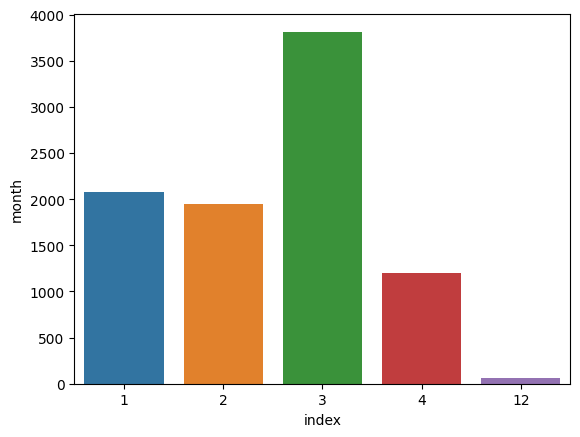

In [46]:
# Method - 1
sns.barplot(x=r1['index'],y=r1['month'])

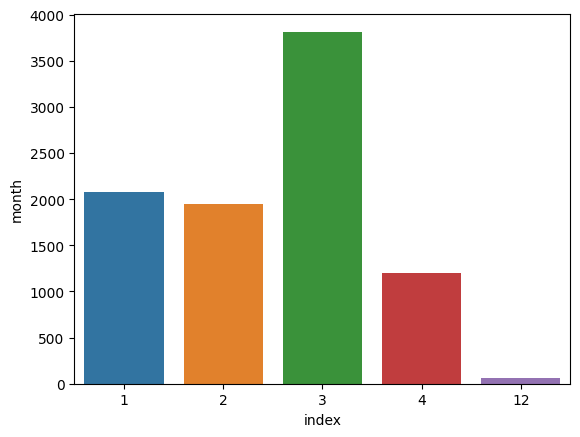

In [47]:
# Method - 2
sns.barplot(data=r1,x='index',y='month')
plt.show()

### Styling BarPlots

**#### Plot month wise mean of cases on a barplot for Mar and Apr for India, Belgium, Russia and Australia**

In [48]:
df_4c = df[ (df['countries'].isin(['India','Belgium','Russia','Australia'])) & (df['month'].isin([3,4]))]
df_4c.shape
# num of rows = 142
# num of cols = 10

(142, 10)

In [49]:
df_4c['countries'].value_counts()

Australia    37
Belgium      37
India        36
Russia       32
Name: countries, dtype: int64

In [50]:
df_4c['month'].value_counts()

3    118
4     24
Name: month, dtype: int64

In [51]:
r2 = df_4c.groupby(['month'])['cases'].mean()
r2

month
3    165.355932
4    639.500000
Name: cases, dtype: float64

<ipython-input-52-28956b9b7ea3>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_4c,x ='month',y='cases',ci=None,color='maroon')


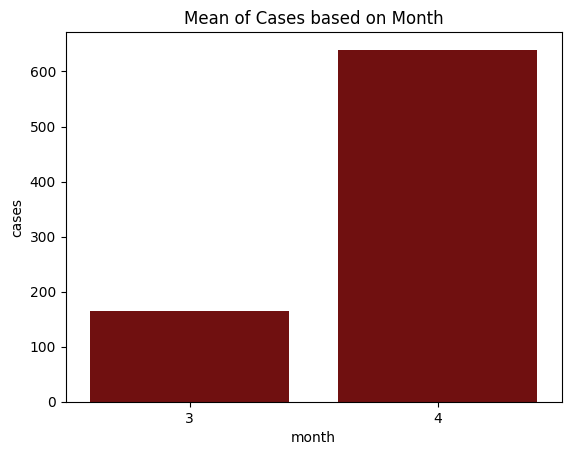

In [52]:
sns.barplot(data=df_4c,x ='month',y='cases',ci=None,color='maroon')
plt.title('Mean of Cases based on Month')
plt.show()

In [53]:
r3 = df_4c.groupby(['month','countries'])['cases'].mean()
print(type(r3))
r3

<class 'pandas.core.series.Series'>


month  countries
3      Australia     146.193548
       Belgium       383.806452
       India          41.600000
       Russia         70.538462
4      Australia     197.833333
       Belgium      1298.666667
       India         469.333333
       Russia        592.166667
Name: cases, dtype: float64

In [54]:
print(r3.index)
print(r3.values)

MultiIndex([(3, 'Australia'),
            (3,   'Belgium'),
            (3,     'India'),
            (3,    'Russia'),
            (4, 'Australia'),
            (4,   'Belgium'),
            (4,     'India'),
            (4,    'Russia')],
           names=['month', 'countries'])
[ 146.19354839  383.80645161   41.6          70.53846154  197.83333333
 1298.66666667  469.33333333  592.16666667]


<ipython-input-55-d2b72f4dfba4>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_4c, x='month',y= 'cases',hue='countries',ci=None)


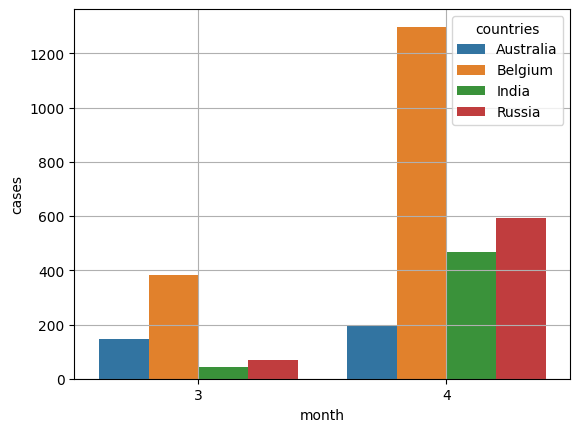

In [55]:
sns.barplot(data=df_4c, x='month',y= 'cases',hue='countries',ci=None)
plt.grid()
plt.show()

### Line Chart

plt.lineplot(x,y,hue,color,style,markers)<br>
x - data(column to be represented on x-axis<br>
y - data(column to be represented on y-axis<br>
color - color of the lines<br>
hue - the column used for grouping. The criteria that decides the color of th line<br>
markers - True or False<br>
style - column based on which markers will be displayed<br>

#### Plot month wise mean of cases on a lineplot for 2020

In [56]:
df_2020 = df[df['year']==2020]
df_2020.shape

(9040, 10)

In [57]:
df_2020 = df.groupby('month')['cases'].mean()
df_2020

month
1       4.717862
2      38.794133
3     181.544692
4     387.240664
12      0.402985
Name: cases, dtype: float64

**Styling LinepLots**

#### Plot month vs mean of cases on a lineplot based on Countries - India, Belgium, Russia and Australia

In [58]:
df_4c = df[df['countries'].isin(['India','Belgium','Russia','Australia'])]
df_4c.shape

(386, 10)

In [59]:
df_4c['countries'].value_counts()

Australia    98
Belgium      98
India        97
Russia       93
Name: countries, dtype: int64

<ipython-input-60-5a6df9367841>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_4c, x='month',y= 'cases',hue='countries',ci=None)


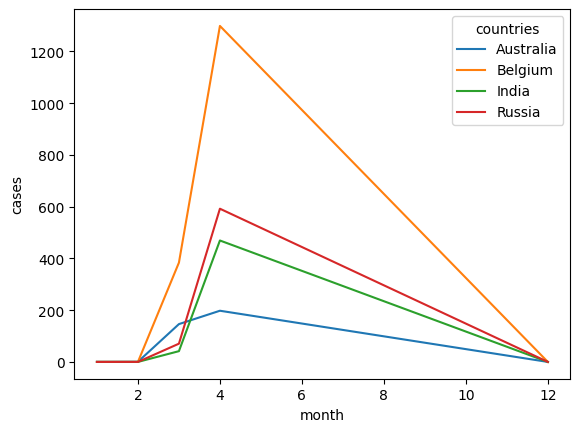

In [60]:
sns.lineplot(data=df_4c, x='month',y= 'cases',hue='countries',ci=None)
plt.show()

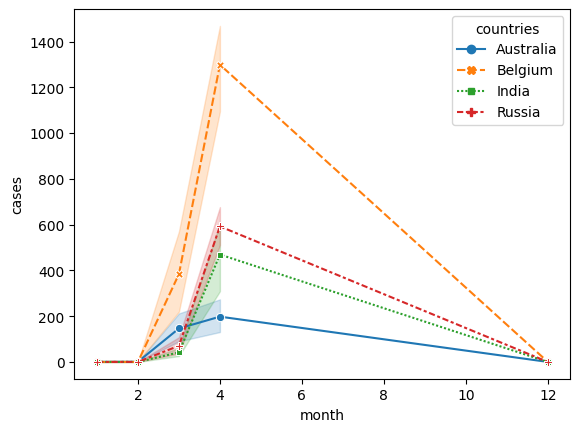

In [61]:
sns.lineplot(data=df_4c, x='month',y= 'cases',hue='countries',
             style='countries',markers=True)
plt.show()